# Data Analysis Examples

## 1.USA.gov Data from Bitly

In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20

In [5]: path = 'datasets/bitly_usagov/example.txt'

In [6]: open(path).readline()
Out[6]: '{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11
(KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1,
"tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l":
"orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r":
"http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u":
"http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc":
1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [3]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [18]: records[0]
Out[18]:
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko)
Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

### Counting Time Zones in Pure Python 用纯Python代码对时区进行计数 

In [4]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [6]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [18]:
from collections import defaultdict

def get_counts2(sequence):
     # values will initialize to 0
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [19]:
counts = get_counts2(time_zones)
# print(counts)
print(counts['America/New_York'])
len(time_zones)

1251


3440

In [20]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [21]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [22]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas 用pandas代码对时区进行计数 

In [23]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()
frame['tz'][:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [24]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [25]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [26]:
plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<AxesSubplot:>

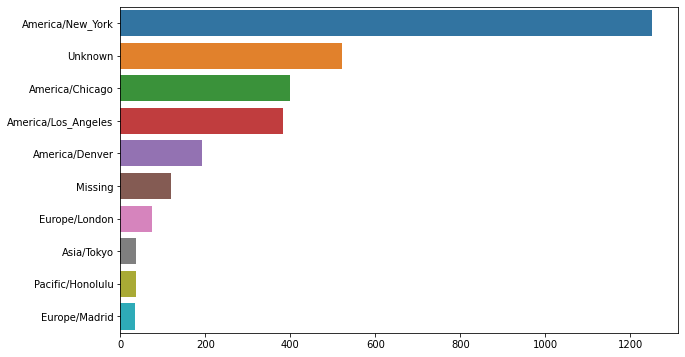

In [27]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [30]:
print(frame['a'][1])
print(frame['a'][50])
print(frame['a'][51])
frame['a'][51][:50]  # long line

GoogleMaps/RochesterNY
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1


'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [32]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [33]:
cframe = frame[frame.a.notnull()]

In [34]:
cframe = cframe.copy()

In [35]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [43]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [79]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os                              Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

In [40]:
test = pd.array([4,9,1,5,3])
print(test.argsort())
test.take(test.argsort())

[2 4 0 3 1]


<IntegerArray>
[1, 3, 4, 5, 9]
Length: 5, dtype: Int64

In [52]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [81]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os                   Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

In [71]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [55]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
Name: total, dtype: float64
                  tz           os  total
0  America/Sao_Paulo  Not Windows   13.0
1  America/Sao_Pa

<AxesSubplot:xlabel='total', ylabel='tz'>

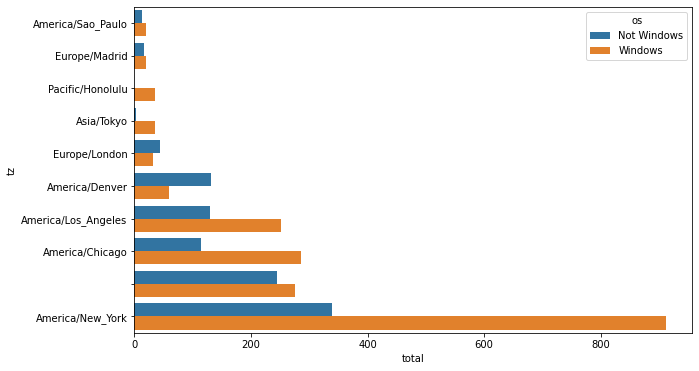

In [82]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
print(count_subset)
count_subset = count_subset.reset_index()
print(count_subset[:10])
sns.barplot(x='total', y='tz', hue='os',  data=count_subset)

In [57]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

In [58]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

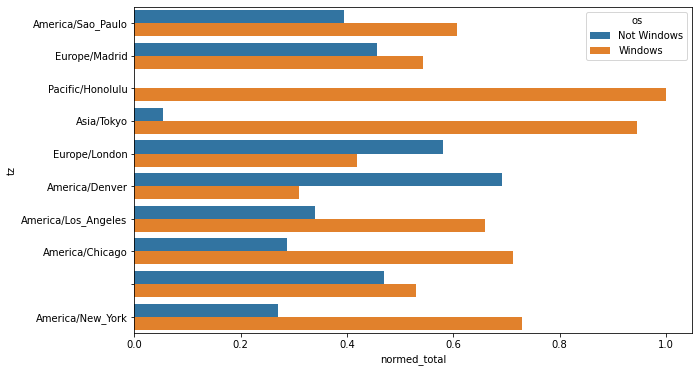

In [59]:
sns.barplot(x='normed_total', y='tz', hue='os',  data=results)

In [67]:
g = count_subset.groupby('tz')
result2 = count_subset.total / g.total.transform('sum')
results['normed_total2'] = count_subset.total / g.total.transform('sum')

<AxesSubplot:xlabel='total', ylabel='tz'>

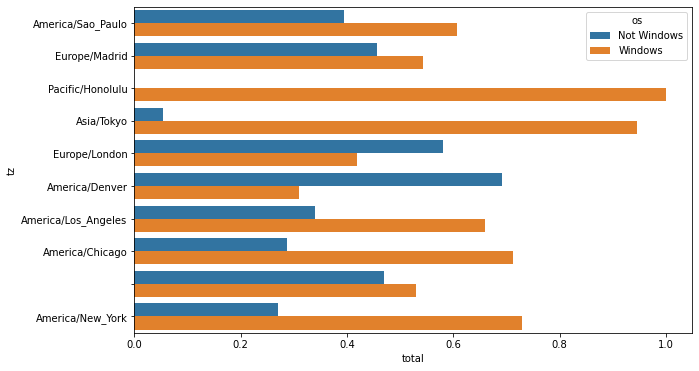

In [68]:
sns.barplot(x=result2, y='tz', hue='os',  data=results)

## MovieLens 1M Dataset

In [83]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                      header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

d:\python38\lib\site-packages\pandas\io\parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [ ]:
users[:5]
ratings[:5]
movies[:5]
ratings

In [84]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [88]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [89]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [90]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender                                    F         M
title                                                
'burbs, The (1989)                 2.793478  2.962085
10 Things I Hate About You (1999)  3.646552  3.311966
101 Dalmatians (1961)              3.791444  3.500000
101 Dalmatians (1996)              3.240000  2.911215
12 Angry Men (1957)                4.184397  4.328421
...                                     ...       ...
Young Guns (1988)                  3.371795  3.425620
Young Guns II (1990)               2.934783  2.904025
Young Sherlock Holmes (1985)       3.514706  3.363344
Zero Effect (1998)                 3.864407  3.723140
eXistenZ (1999)                    3.098592  3.289086

[1216 rows x 2 columns]

In [93]:
 mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

In [92]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender                                                     F         M
title                                                                 
Close Shave, A (1995)                               4.644444  4.473795
Wrong Trousers, The (1993)                          4.588235  4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075
Schindler's List (1993)                             4.562602  4.491415
Shawshank Redemption, The (1994)                    4.539075  4.560625
Grand Day Out, A (1992)                             4.537879  4.293255
To Kill a Mockingbird (1962)                        4.536667  4.372611
Creature Comforts (1990)                            4.513889  4.272277
Usual Suspects, The (1995)                          4.513317  4.518248

### Measuring Rating Disagreement 

In [94]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [95]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender                                        F         M      diff
title                                                              
Dirty Dancing (1987)                   3.790378  2.959596 -0.830782
Jumpin' Jack Flash (1986)              3.254717  2.578358 -0.676359
Grease (1978)                          3.975265  3.367041 -0.608224
Little Women (1994)                    3.870588  3.321739 -0.548849
Steel Magnolias (1989)                 3.901734  3.365957 -0.535777
Anastasia (1997)                       3.800000  3.281609 -0.518391
Rocky Horror Picture Show, The (1975)  3.673016  3.160131 -0.512885
Color Purple, The (1985)               4.158192  3.659341 -0.498851
Age of Innocence, The (1993)           3.827068  3.339506 -0.487561
Free Willy (1993)                      2.921348  2.438776 -0.482573

In [96]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender                                         F         M      diff
title                                                               
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  0.726351
Kentucky Fried Movie, The (1977)        2.878788  3.555147  0.676359
Dumb & Dumber (1994)                    2.697987  3.336595  0.638608
Longest Day, The (1962)                 3.411765  4.031447  0.619682
Cable Guy, The (1996)                   2.250000  2.863787  0.613787
Evil Dead II (Dead By Dawn) (1987)      3.297297  3.909283  0.611985
Hidden, The (1987)                      3.137931  3.745098  0.607167
Rocky III (1982)                        2.361702  2.943503  0.581801
Caddyshack (1980)                       3.396135  3.969737  0.573602
For a Few Dollars More (1965)           3.409091  3.953795  0.544704

In [97]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## US Baby Names 1880–2010

In [4]: names.head(10)
Out[4]:
        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880
5   Margaret   F    1578  1880
6        Ida   F    1472  1880
7      Alice   F    1414  1880
8     Bertha   F    1320  1880
9      Sarah   F    1288  1880

In [2]:
print(1)

1


In [ ]:
!head -n 10 datasets/babynames/yob1880.txt

In [3]:
import pandas as pd
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]

In [4]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [6]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['path'] = path
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names1 = pd.concat(pieces, ignore_index=True)
names1

name sex  births                            path  year
0             Mary   F    7065  datasets/babynames/yob1880.txt  1880
1             Anna   F    2604  datasets/babynames/yob1880.txt  1880
2             Emma   F    2003  datasets/babynames/yob1880.txt  1880
3        Elizabeth   F    1939  datasets/babynames/yob1880.txt  1880
4           Minnie   F    1746  datasets/babynames/yob1880.txt  1880
...            ...  ..     ...                             ...   ...
1690779    Zymaire   M       5  datasets/babynames/yob2010.txt  2010
1690780     Zyonne   M       5  datasets/babynames/yob2010.txt  2010
1690781  Zyquarius   M       5  datasets/babynames/yob2010.txt  2010
1690782      Zyran   M       5  datasets/babynames/yob2010.txt  2010
1690783      Zzyzx   M       5  datasets/babynames/yob2010.txt  2010

[1690784 rows x 5 columns]

In [6]:
names

name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]

In [7]:
# names1 = pd.concat(pieces)
# names1

name sex  births  year
0           Mary   F    7065  1880
1           Anna   F    2604  1880
2           Emma   F    2003  1880
3      Elizabeth   F    1939  1880
4         Minnie   F    1746  1880
...          ...  ..     ...   ...
33833    Zymaire   M       5  2010
33834     Zyonne   M       5  2010
33835  Zyquarius   M       5  2010
33836      Zyran   M       5  2010
33837      Zzyzx   M       5  2010

[1690784 rows x 4 columns]

sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

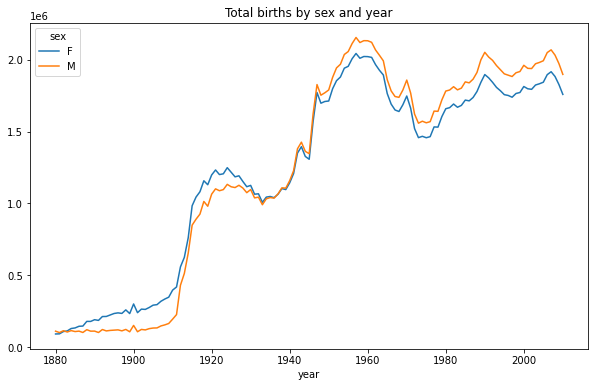

In [9]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
print(total_births.tail())
total_births.plot(title='Total births by sex and year')

In [13]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [14]:
names

name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  2010  0.000003
1690781  Zyquarius   M       5  2010  0.000003
1690782      Zyran   M       5  2010  0.000003
1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [13]:
names.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
#names.groupby(['year', 'sex']).prop.sum()

sex     F    M
year          
1880  1.0  1.0
1881  1.0  1.0
1882  1.0  1.0
1883  1.0  1.0
1884  1.0  1.0
...   ...  ...
2006  1.0  1.0
2007  1.0  1.0
2008  1.0  1.0
2009  1.0  1.0
2010  1.0  1.0

[131 rows x 2 columns]

In [15]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
def get_top(group):
    return group.sort_values(by='births', ascending=False)
grouped = names.groupby(['year', 'sex'])
# print(grouped.apply(get_top))#.reset_index(inplace=True, drop=True))
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
print(top1000, top1000.index)
top1000.reset_index(inplace=True, drop=True)
top1000

                       name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns] MultiIndex([(1880, 'F',       0),
            (1880, 'F',       1),
            (1880, 'F',       2),
            (1880, 'F',       3),
            (1880, 'F',       4),
            (1880, 'F',       5),
            (1880, 'F',       6),
       

name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
261872     Camilo   M     194  2010  0.000102
261873     Destin   M     194  2010  0.000102
261874     Jaquan   M     194  2010  0.000102
261875     Jaydan   M     194  2010  0.000102
261876     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

#DIY
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [19]:
top1000

name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
261872     Camilo   M     194  2010  0.000102
261873     Destin   M     194  2010  0.000102
261874     Jaquan   M     194  2010  0.000102
261875     Jaydan   M     194  2010  0.000102
261876     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

### Analyzing Naming Trends 分析命名趋势

In [16]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [17]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB
None
name   Aaden  Aaliyah  Aarav   Aaron  Aarush  Ab  Abagail  Abb  Abbey  Abbie  \
year                                                                           
1880     NaN      NaN    NaN   102.0     NaN NaN      NaN  NaN    NaN   71.0   
1881     NaN      NaN    NaN    94.0     NaN NaN      NaN  NaN    NaN   81.0   
1882     NaN      NaN    NaN    85.0     NaN NaN      NaN  NaN    NaN   80.0   
1883     NaN      NaN    NaN   105.0     NaN NaN      NaN  NaN    NaN   79.0   
1884     NaN      NaN    NaN    97.0     NaN NaN      NaN  NaN    NaN   98.0   
...      ...      ...    ...     ...     ...  ..      ...  ...    ...    ...   
2006     NaN   3737.0    NaN  8279.0     NaN NaN    297.0  NaN  404.0  440.0   
2007     NaN   3941.0    NaN  8914.0     NaN NaN    313.0  NaN  349.0  468.0   
2008   955.0   4028.0  219.0  8511.0   

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

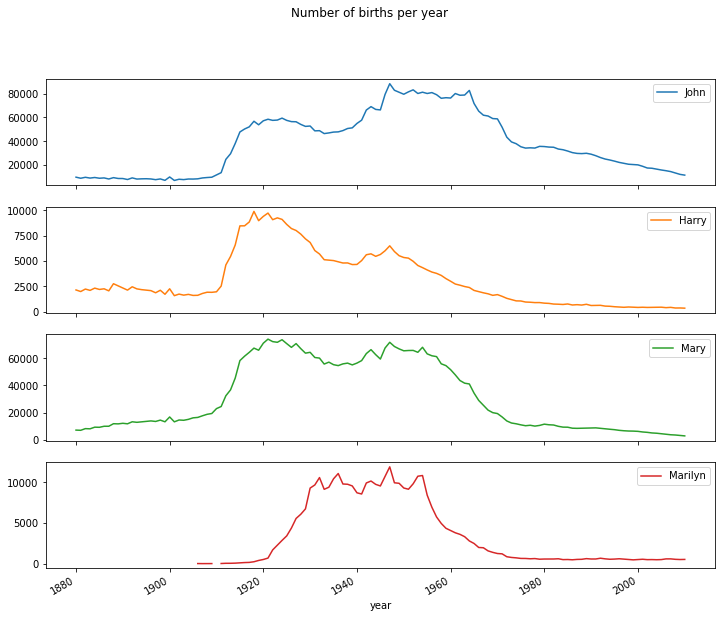

In [21]:
print(total_births.info())
print(total_births)
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

#### Measuring the increase in naming diversity 评估命名多样性的增长

In [ ]:
plt.figure()

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

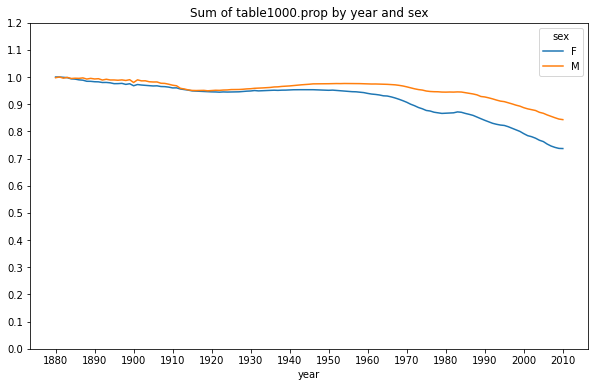

In [22]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [ ]:
df = boys[boys.year == 2010]
df

In [ ]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

In [23]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [24]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

sex    F   M
year        
1880  38  14
1881  38  14
1882  38  15
1883  39  15
1884  39  16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

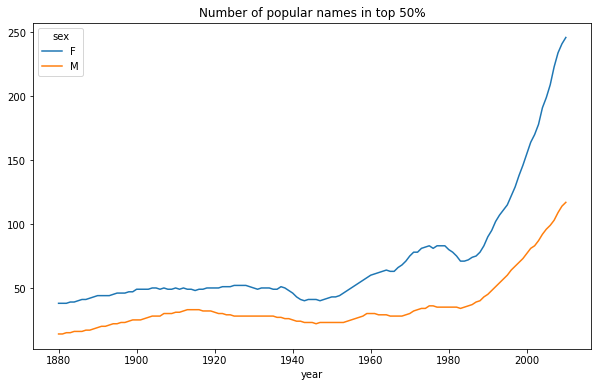

In [26]:
print(diversity.head())
diversity.plot(title="Number of popular names in top 50%")

#### The “last letter” revolution “最后一个字母”的变革

In [28]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
print(last_letters)
table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
table

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object


sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
...              ...      ...      ...      ...      ...      ...      ...   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
...              ...      ...      ...  ...       ...       ...       ...   
v                NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w                NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x                NaN      NaN      NaN  ...   10691.0   11009.0   11718.0   
y            14980.0  17931.0  17601.0  ...  139109.0  134557.0  130569.0   
z              188.0    238.0    277.0  ...    2840.0    2737.0    2722.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   
...               ...       ...       ...       ...       ...       ...   
v              1823.0    1794.0    2010.0    2295.0    2418.0    2589.0   
w             47556.0   45464.0   43217.0   40251.0   36937.0   33181.0   
x             12399.0   13025.0   13992.0   14306.0   14834.0   16640.0   
y            128367.0  125190.0  123707.0  123397.0  122633.0  112922.0   
z              2710.0    2903.0    3086.0    3301.0    3473.0    3633.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  
...               ...  
v              2723.0  
w             30656.0  
x             16352.0  
y            110425.0  
z              3476.0  

[26 rows x 262 columns]

In [29]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [30]:
print(subtable.sum())
letter_prop = subtable / subtable.sum()
letter_prop

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64


sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [ ]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

In [ ]:
plt.close('all')

In [ ]:
fig = plt.figure()

In [ ]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [31]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [32]:
filtered = top1000[top1000.name.isin(lesley_like)]

filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [36]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail(20)

sex          F         M
year                    
1991  0.913356  0.086644
1992  0.929227  0.070773
1993  0.928419  0.071581
1994  0.928423  0.071577
1995  0.937332  0.062668
1996  0.953191  0.046809
1997  0.960549  0.039451
1998  1.000000       NaN
1999  1.000000       NaN
2000  1.000000       NaN
2001  1.000000       NaN
2002  1.000000       NaN
2003  1.000000       NaN
2004  1.000000       NaN
2005  1.000000       NaN
2006  1.000000       NaN
2007  1.000000       NaN
2008  1.000000       NaN
2009  1.000000       NaN
2010  1.000000       NaN

In [34]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='year'>

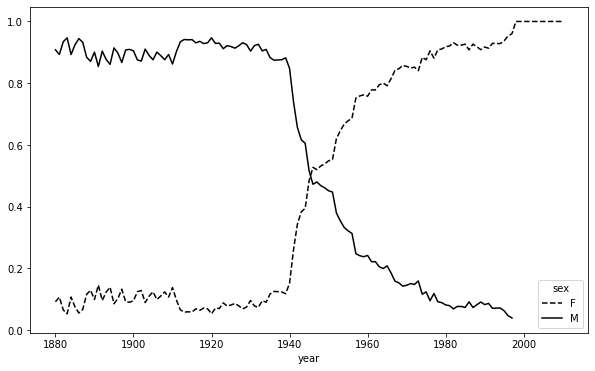

In [35]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## USDA Food Database

{
  "id": 21441,
  "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY,
Wing, meat and skin with breading",
  "tags": ["KFC"],
  "manufacturer": "Kentucky Fried Chicken",
  "group": "Fast Foods",
  "portions": [
    {
      "amount": 1,
      "unit": "wing, with skin",
      "grams": 68.0
    },

    ...
  ],
  "nutrients": [
    {
      "value": 20.8,
      "units": "g",
      "description": "Protein",
      "group": "Composition"
    },

    ...
  ]
}

In [5]:
import json
db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

In [ ]:
db[0].keys()
db[0]['nutrients'][0]
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

In [12]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [ ]:
pd.value_counts(info.group)[:10]

In [3]:
print(2)

2


In [6]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = (rec['id']
    print(rec['id']
    nutrients.append(fnuts)

print(nutrients)


[       value units                         description        group    id
0     25.180     g                             Protein  Composition  1008
1     29.200     g                   Total lipid (fat)  Composition  1008
2      3.060     g         Carbohydrate, by difference  Composition  1008
3      3.280     g                                 Ash        Other  1008
4    376.000  kcal                              Energy       Energy  1008
..       ...   ...                                 ...          ...   ...
157    1.472     g                              Serine  Amino Acids  1008
158   93.000    mg                         Cholesterol        Other  1008
159   18.584     g        Fatty acids, total saturated        Other  1008
160    8.275     g  Fatty acids, total monounsaturated        Other  1008
161    0.830     g  Fatty acids, total polyunsaturated        Other  1008

[162 rows x 5 columns],        value units                         description        group    id
0     24.900

In [8]:
nutrients = pd.concat(nutrients, ignore_index=True)
len(nutrients)

389355

In [9]:
nutrients.duplicated().sum()  # number of duplicates

14179

In [10]:
nutrients = nutrients.drop_duplicates()
len(nutrients)

375176

In [13]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
print(info.info())
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   value     375176 non-null  float64
 1   units     375176 non-null  object 
 2   nutrient  375176 non-null  object 
 3   nutgroup  375176 non-null  object 
 4   id        375176 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [14]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
print(ndata.info())
ndata.iloc[30000]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB
None


value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [15]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

In [24]:
ndata.groupby(['nutrient', 'fgroup'])['value'].size()

nutrient          fgroup                           
Adjusted Protein  Sweets                                 1
                  Vegetables and Vegetable Products      1
Alanine           Baby Foods                            37
                  Baked Products                       378
                  Beef Products                        598
                                                      ... 
Zinc, Zn          Snacks                               154
                  Soups, Sauces, and Gravies           156
                  Spices and Herbs                      41
                  Sweets                               279
                  Vegetables and Vegetable Products    795
Name: value, Length: 2246, dtype: int64

In [65]:
t = ndata.groupby(['nutrient', 'fgroup'])['value']
# t.groups[('Adjusted Protein', 'Sweets')]
t1 = t.groups[('Zinc, Zn', 'Snacks')]
t.count()['Zinc, Zn']

fgroup
Baby Foods                           209
Baked Products                       433
Beef Products                        618
Beverages                            228
Breakfast Cereals                    384
                                    ... 
Snacks                               154
Soups, Sauces, and Gravies           156
Spices and Herbs                      41
Sweets                               279
Vegetables and Vegetable Products    795
Name: value, Length: 25, dtype: int64

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64


<AxesSubplot:ylabel='fgroup'>

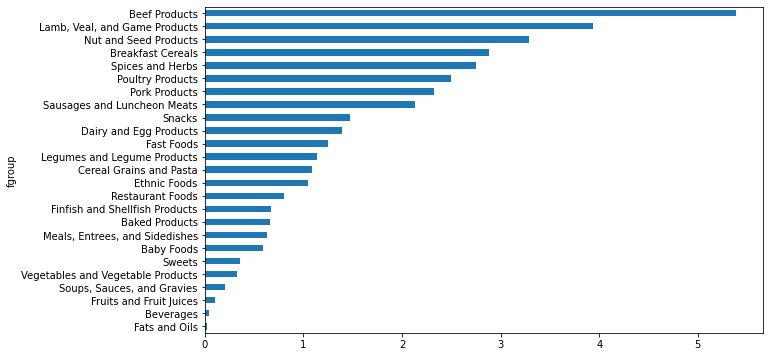

In [66]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
print(result)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [83]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximun = lambda x:x.loc[x.value.idxmax()]
max_food = by_nutrient.apply(get_maximun)[["value", "food"]]
max_food.food = max_food.food.str[:50]

max_food

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
            Cystine                          1.307   
            Glutamic acid                   17.452   
...                                            ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   
            Vitamin D3 (cholecalciferol)    27.400   
            Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                       food  
nutgroup    nutrient                                                                         
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened  
            Arginine                                           Seeds, sesame flour, low-fat  
            Aspartic acid                                               Soy protein isolate  
            Cystine                            Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                               Soy protein isolate  
...                                                                                     ...  
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw  
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw  
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...  
            Vitamin K (phylloquinone)                                  Spices, sage, ground  

[94 rows x 2 columns]

In [84]:
max_food.loc["Amino Acids"]['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [ ]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [ ]:
max_foods.loc['Amino Acids']['food']

## 2012 Federal Election Commission Database 2012联邦选举委员会数据库

In [85]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

d:\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [86]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [88]:
unique_cands = fec.cand_nm.unique()
print(unique_cands)
unique_cands[2]

['Bachmann, Michelle' 'Romney, Mitt' 'Obama, Barack'
 "Roemer, Charles E. 'Buddy' III" 'Pawlenty, Timothy' 'Johnson, Gary Earl'
 'Paul, Ron' 'Santorum, Rick' 'Cain, Herman' 'Gingrich, Newt'
 'McCotter, Thaddeus G' 'Huntsman, Jon' 'Perry, Rick']


'Obama, Barack'

In [90]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [91]:
fec.cand_nm[123456:123461]
fec.cand_nm[123456:123461].map(parties)
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [92]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [93]:
fec = fec[fec.contb_receipt_amt > 0]

In [94]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [95]:
fec_mrbo

cmte_id    cand_id        cand_nm           contbr_nm contbr_city  \
411     C00431171  P80003353   Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
412     C00431171  P80003353   Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
413     C00431171  P80003353   Romney, Mitt    CARLSEN, RICHARD         APO   
414     C00431171  P80003353   Romney, Mitt      DELUCA, PIERRE         APO   
415     C00431171  P80003353   Romney, Mitt    SARGENT, MICHAEL         APO   
...           ...        ...            ...                 ...         ...   
701381  C00431445  P80003338  Obama, Barack      MOUNTS, ROBERT         APO   
701382  C00431445  P80003338  Obama, Barack     TAITANO, TYRONE     HAGATNA   
701383  C00431445  P80003338  Obama, Barack      TUCKER, PAMELA         APO   
701384  C00431445  P80003338  Obama, Barack      MOUNTS, ROBERT         APO   
701385  C00431445  P80003338  Obama, Barack         NEAL, AMBER         APO   

       contbr_st   contbr_zip                         contbr_employer  \
411           AA   3.4023e+08                           US GOVERNMENT   
412           AA   3.4023e+08                           US GOVERNMENT   
413           AE    9.128e+07             DEFENSE INTELLIGENCE AGENCY   
414           AE    9.128e+07                                   CISCO   
415           AE  9.01201e+07        RAYTHEON TECHNICAL SERVICES CORP   
...          ...          ...                                     ...   
701381        ZZ    962043077                       HQ USFK (FKDC-SA)   
701382        ZZ    969323373                            NOT EMPLOYED   
701383        ZZ    963190030                                   DODEA   
701384        ZZ    962043077                       HQ USFK (FKDC-SA)   
701385        ZZ    091022065  THE DEPARTMENT OF DEFENSE EDUCATION AC   

                            contbr_occupation  contb_receipt_amt  \
411                   FOREIGN SERVICE OFFICER               25.0   
412                   FOREIGN SERVICE OFFICER              110.0   
413                      INTELLIGENCE ANALYST              250.0   
414                                  ENGINEER               30.0   
415                 COMPUTER SYSTEMS ENGINEER              100.0   
...                                       ...                ...   
701381  GS-15 INTERNATIONAL RELATIONS OFFICER               25.0   
701382                                RETIRED              250.0   
701383                               EDUCATOR                3.0   
701384  GS-15 INTERNATIONAL RELATIONS OFFICER               25.0   
701385                                TEACHER              135.0   

       contb_receipt_dt receipt_desc memo_cd                  memo_text  \
411           01-FEB-12          NaN     NaN                        NaN   
412           01-FEB-12          NaN     NaN                        NaN   
413           13-APR-12          NaN     NaN                        NaN   
414           21-AUG-11          NaN     NaN                        NaN   
415           07-MAR-12          NaN     NaN                        NaN   
...                 ...          ...     ...                        ...   
701381        26-FEB-12          NaN     NaN                        NaN   
701382        20-JAN-12          NaN     NaN                        NaN   
701383        20-JAN-12          NaN     NaN                        NaN   
701384        26-APR-12          NaN     NaN                        NaN   
701385        04-SEP-11          NaN       X  * OBAMA VICTORY FUND 2012   

       form_tp  file_num       party  
411      SA17A    780124  Republican  
412      SA17A    780124  Republican  
413      SA17A    785689  Republican  
414      SA17A    760261  Republican  
415      SA17A    780128  Republican  
...        ...       ...         ...  
701381   SA17A    787803    Democrat  
701382   SA17A    775668    Democrat  
701383   SA17A    775668    Democrat  
701384   SA17A    785239    Democrat  
701385    SA18    756218    Democrat 

### Donation Statistics by Occupation and Employer 根据职业和雇主统计赞助信息

In [ ]:
fec.contbr_occupation.value_counts()[:10]

In [ ]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [ ]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

In [ ]:
plt.figure()

In [ ]:
over_2mm.plot(kind='barh')

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### Bucketing Donation Amounts

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

In [ ]:
plt.figure()

In [ ]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh')

### Donation Statistics by State

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

In [ ]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

## Conclusion